In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import InputLayer, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

C:\Users\rdesa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rdesa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rdesa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rdesa\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
# data preprocessing
DNAData = pd.read_csv("data.csv")
DNANames = DNAData.columns.values
DNADataNp = DNAData.to_numpy()
samples, labels = DNADataNp.shape
x1 = []
x2 = []
labellist = []
for label in range(0,labels,2):
    for sample in range(samples): 
        x1.append(DNADataNp[:,label][sample])
        x2.append(DNADataNp[:,label+1][sample])
        labellist.append(DNANames[label+1])
DNADataReshapeT = np.array([x1,x2])
DNADataReshape = np.transpose(DNADataReshapeT)
labelnp = np.transpose(np.array(labellist))
print(DNADataReshape.shape)
print(labelnp.shape)

(2000, 2)
(2000,)


In [3]:
#Splitting data
DNADataReshape.shape
labelnp.shape
X_train, X_test, y_train, y_test = train_test_split(DNADataReshape, labelnp, test_size=0.3, random_state= 24787)

In [4]:
OneHot = y_train 
length, = OneHot.shape
OneHotLab = []

for index in range(length):
    #print(OneHot[index])
    if OneHot[index] == "CYS":
        OneHotLab.append(0)
    elif OneHot[index] == "LEU":
        OneHotLab.append(1)
    elif OneHot[index] == "HIS":
        OneHotLab.append(2)
    elif OneHot[index] == "THR":
        OneHotLab.append(3)
    elif OneHot[index] == "GLN":
        OneHotLab.append(4)
    elif OneHot[index] == "MET":
        OneHotLab.append(5)
    elif OneHot[index] == "ARG":
        OneHotLab.append(6)
    elif OneHot[index] == "VAL":
        OneHotLab.append(7)
    elif OneHot[index] == "LYS":
        OneHotLab.append(8)
    elif OneHot[index] == "ALA":
        OneHotLab.append(9)
    elif OneHot[index] == "SER":
        OneHotLab.append(10)
    elif OneHot[index] == "GLU":
        OneHotLab.append(11)
    elif OneHot[index] == "GLY":
        OneHotLab.append(12)
    elif OneHot[index] == "ISO":
        OneHotLab.append(13)
    elif OneHot[index] == "TYR":
        OneHotLab.append(14)
    elif OneHot[index] == "ASN":
        OneHotLab.append(15)
    elif OneHot[index] == "PRO":
        OneHotLab.append(16)
    elif OneHot[index] == "TRP":
        OneHotLab.append(17)
    elif OneHot[index] == "PHE":
        OneHotLab.append(18)
    elif OneHot[index] == "ASP":
        OneHotLab.append(19)
    else:
        OneHotLab.append(20)
        print(OneHot[index])

Y_train = np.array(OneHotLab)

In [5]:
OneHot = y_test 
length, = OneHot.shape
OneHotLab = []

for index in range(length):
    #print(OneHot[index])
    if OneHot[index] == "CYS":
        OneHotLab.append(0)
    elif OneHot[index] == "LEU":
        OneHotLab.append(1)
    elif OneHot[index] == "HIS":
        OneHotLab.append(2)
    elif OneHot[index] == "THR":
        OneHotLab.append(3)
    elif OneHot[index] == "GLN":
        OneHotLab.append(4)
    elif OneHot[index] == "MET":
        OneHotLab.append(5)
    elif OneHot[index] == "ARG":
        OneHotLab.append(6)
    elif OneHot[index] == "VAL":
        OneHotLab.append(7)
    elif OneHot[index] == "LYS":
        OneHotLab.append(8)
    elif OneHot[index] == "ALA":
        OneHotLab.append(9)
    elif OneHot[index] == "SER":
        OneHotLab.append(10)
    elif OneHot[index] == "GLU":
        OneHotLab.append(11)
    elif OneHot[index] == "GLY":
        OneHotLab.append(12)
    elif OneHot[index] == "ISO":
        OneHotLab.append(13)
    elif OneHot[index] == "TYR":
        OneHotLab.append(14)
    elif OneHot[index] == "ASN":
        OneHotLab.append(15)
    elif OneHot[index] == "PRO":
        OneHotLab.append(16)
    elif OneHot[index] == "TRP":
        OneHotLab.append(17)
    elif OneHot[index] == "PHE":
        OneHotLab.append(18)
    elif OneHot[index] == "ASP":
        OneHotLab.append(19)
    else:
        OneHotLab.append(20)
        print(OneHot[index])

Y_test = np.array(OneHotLab)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 2, 1)
print(X_train.shape)
num_classes = 20
Y_train = keras.utils.to_categorical(Y_train, num_classes)
print(Y_train.shape)
X_test = X_test.reshape(X_test.shape[0], 2, 1)
print(X_test.shape)
num_classes = 20
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print(Y_test.shape)
input_shape = (2,1)

(1400, 2, 1)
(1400, 20)
(600, 2, 1)
(600, 20)


In [7]:
# Sequential model is a linear stack of layers
input_shape = (2,1)
num_classes= 20
model = Sequential()

# Our input is a 28 by 28 image/matrix, in implementation (28x28x1)
model.add(InputLayer(input_shape=input_shape))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)              

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
batch_size = 200
epochs = 400
# train network by calling fit function
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,callbacks=[callback],
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate the accuracy of trained model using the testing data
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1400 samples, validate on 600 samples
Epoch 1/400
1400/1400 [==============================] - 1s 540us/step - loss: 2.9543 - accuracy: 0.0493 - val_loss: 2.7999 - val_accuracy: 0.0483
Epoch 2/400
1400/1400 [==============================] - 0s 61us/step - loss: 2.7814 - accuracy: 0.0821 - val_loss: 2.4868 - val_accuracy: 0.1050
Epoch 3/400
1400/1400 [==============================] - 0s 55us/step - loss: 2.5959 - accuracy: 0.0971 - val_loss: 2.4260 - val_accuracy: 0.1067
Epoch 4/400
1400/1400 [==============================] - 0s 49us/step - loss: 2.5220 - accuracy: 0.1186 - val_loss: 2.3273 - val_accuracy: 0.1050
Epoch 5/400
1400/1400 [==============================] - 0s 49us/step - loss: 2.3785 - accuracy: 0.1650 - val_loss: 2.1858 - val_accuracy: 0.1700
Epoch 6/400
1400/1400 [==============================] - 0s 53us/step - loss: 2.3503 - accuracy: 0.1664 - val_loss: 2.2356 - val_accuracy: 0.2300
Epoch 7/400
1400/1400 [==============================] - 0s 52us/step - loss

Epoch 112/400
1400/1400 [==============================] - 0s 45us/step - loss: 0.3544 - accuracy: 0.8429 - val_loss: 0.2471 - val_accuracy: 0.9067
Epoch 113/400
1400/1400 [==============================] - 0s 45us/step - loss: 0.3339 - accuracy: 0.8550 - val_loss: 0.2490 - val_accuracy: 0.9217
Epoch 114/400
1400/1400 [==============================] - 0s 44us/step - loss: 0.2825 - accuracy: 0.8929 - val_loss: 0.2267 - val_accuracy: 0.8933
Epoch 115/400
1400/1400 [==============================] - 0s 45us/step - loss: 0.2388 - accuracy: 0.9043 - val_loss: 0.1934 - val_accuracy: 0.9100
Epoch 116/400
1400/1400 [==============================] - 0s 46us/step - loss: 0.2175 - accuracy: 0.9214 - val_loss: 0.1782 - val_accuracy: 0.9417
Epoch 117/400
1400/1400 [==============================] - 0s 45us/step - loss: 0.2258 - accuracy: 0.9136 - val_loss: 0.3811 - val_accuracy: 0.8650
Epoch 118/400
1400/1400 [==============================] - 0s 45us/step - loss: 0.3219 - accuracy: 0.8843 - val_

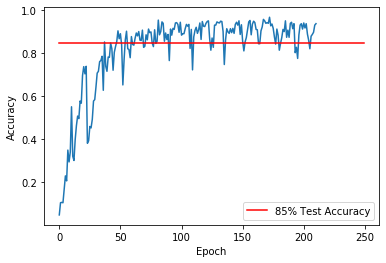

In [9]:
plt.plot(history.history['val_accuracy'])
x = np.array(range(0,250))
y = np.ones(250)*0.85
plt.plot(x,y,c="red",label="85% Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1773594323794047
Test accuracy: 0.9383333325386047
